In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img = cv2.imread("paimeng.png")

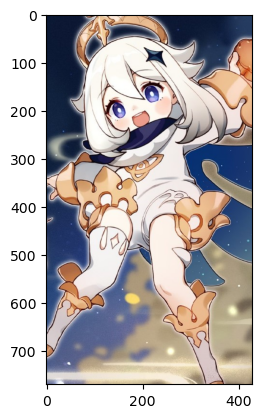

In [2]:
# 1. 显示原图img[:,:,::-1]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

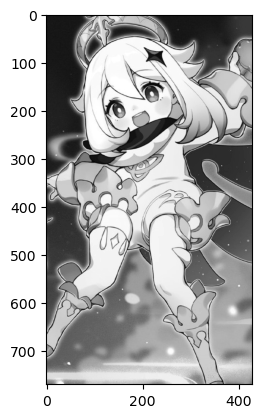

In [3]:
# 2. 转换为灰度图像
# 将BGR三通道转换为单通道灰度图像
# 参数:
#   - src: 输入图像
#   - code: 转换模式，常用 cv2.COLOR_BGR2GRAY (BGR 转灰度)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

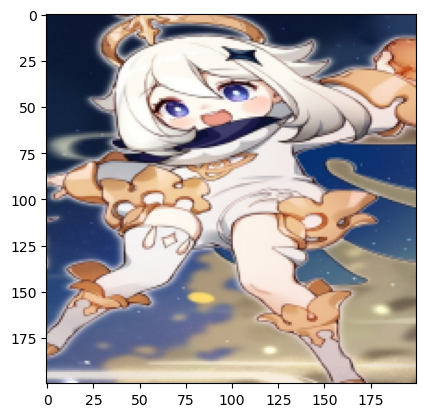

In [4]:
# 3. 调整图像大小
# 参数:
#   - src: 输入图像
#   - dsize: 目标尺寸 (宽度, 高度)
#   - fx: 水平缩放比例
#   - fy: 垂直缩放比例
#   - interpolation: 插值方法，常用：
#   - cv2.INTER_LINEAR：双线性插值（默认，速度快）
#   - cv2.INTER_CUBIC：双三次插值（质量更高，速度较慢）
#   - cv2.INTER_NEAREST：最近邻插值（速度快，质量低）
#   - cv2.INTER_AREA：区域插值（缩小图像时效果好）
resized_image = cv2.resize(img_rgb, (200, 200),interpolation=cv2.INTER_AREA)  # 宽度 300，高度 200
plt.imshow(resized_image)

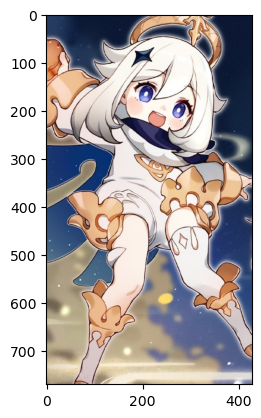

In [5]:
# 4.翻转图像
# src：输入图像，可以是任意类型和深度的多通道图像。
# flipCode：指定翻转类型的整数标志：
# 0：沿 X 轴翻转（垂直翻转）。
# 1：沿 Y 轴翻转（水平翻转）。
# -1：沿 X 轴和 Y 轴翻转（同时水平和垂直翻转）。
flipped_image = cv2.flip(img_rgb, 1)
plt.imshow(flipped_image)

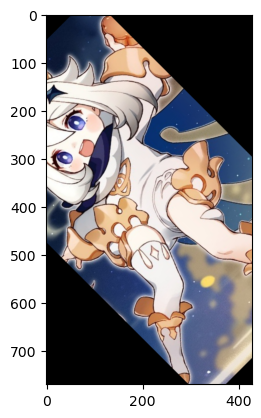

In [6]:
# 5.图像旋转
# 获取图像尺寸
(h, w) = img_rgb.shape[:2]
# 设置旋转中心和角度
center = (w // 2, h // 2)
angle = 45  # 旋转角度
scale = 1.0  # 缩放比例

# 计算旋转矩阵
# center：旋转中心点的坐标，格式为 (x, y)。
# angle：旋转角度，单位为度。正角度表示逆时针旋转，负角度表示顺时针旋转。
# scale：缩放比例。若设置为 1，则不进行缩放。
M = cv2.getRotationMatrix2D(center, angle, scale)

# 进行旋转
# src：输入图像。
# M：2x3 的变换矩阵，类型为 np.float32。
# dsize：输出图像的尺寸，形式为 (width, height)。
# dst：输出图像（可选）。
# flags：插值方法，常用 cv2.INTER_LINEAR。
# borderMode：边界填充模式，常用 cv2.BORDER_CONSTANT。
# borderValue：边界填充值，默认为 0（黑色）。
rotated_image = cv2.warpAffine(img_rgb, M, (w, h))
plt.imshow(rotated_image)


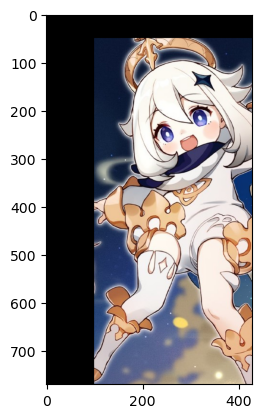

In [7]:
# 6. 图像平移
# 定义平移距离
tx, ty = 100, 50  # x 轴平移 100 像素，y 轴平移 50 像素

# 创建平移矩阵
M = np.float32([[1, 0, tx], [0, 1, ty]])

# 进行平移
translated_image = cv2.warpAffine(img_rgb, M, (img.shape[1], img.shape[0]))
plt.imshow(translated_image)

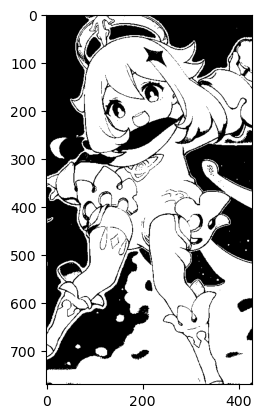

In [8]:
# 7. 二值化
"""
原理：将灰度图像转换为二值图像
参数：
- 图像
- thresh：阈值（当类型为OTSU时自动计算）
- maxval：最大值（通常255）
- type：
    cv2.THRESH_BINARY（默认）：大于阈值设为maxval，否则0
    cv2.THRESH_OTSU：自动确定最佳阈值（需设thresh=0）
"""
_, binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

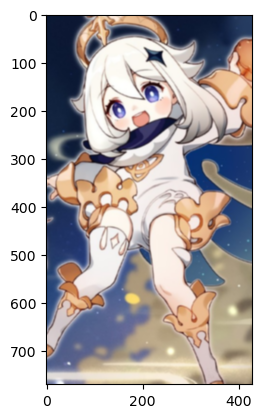

In [9]:
# 8. 高斯模糊
"""
原理：使用高斯核对图像卷积，消除高频噪声
参数：
- ksize：高斯核大小（必须为正奇数）
- sigmaX：X方向标准差（0表示自动计算）
- sigmaY：Y方向标准差（默认等于sigmaX）
"""
blurred = cv2.GaussianBlur(img_rgb, (5, 5), sigmaX=1.5)
plt.imshow(blurred)

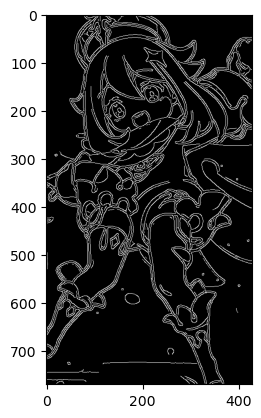

In [10]:
# 9. 边缘检测
"""
原理：Canny边缘检测算法（梯度+非极大抑制+双阈值）
参数：
- threshold1：低阈值
- threshold2：高阈值
推荐高低阈值比在1:2到1:3之间
"""
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
plt.imshow(edges, cmap='gray')

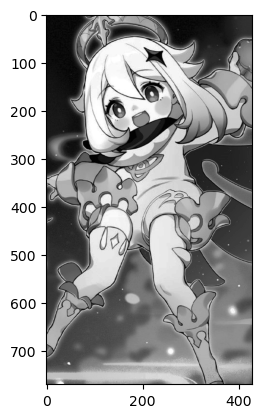

In [11]:
#10. 直方图均衡化
"""
原理：扩展图像动态范围，增强对比度
（仅适用于灰度图像）
"""
equalized = cv2.equalizeHist(img_gray)
plt.imshow(equalized, cmap='gray')